In [ ]:
# import all the libraies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch                                        # root package
from torch.utils.data import Dataset, DataLoader    # dataset representation and loading
import torch.autograd as autograd         # computation graph
from torch import Tensor                  # tensor node in the computation graph
import torch.nn as nn                     # neural networks
import torch.nn.functional as F           # layers, activations and more
import torch.optim as optim               # optimizers e.g. gradient descent, ADAM, etc.
from torch.jit import script, trace       # hybrid frontend decorator and tracing jit
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor , Lambda
from torchvision import transforms
%matplotlib inline

In [ ]:
transform =  transforms.Compose([transforms.ToTensor(), transforms.Normalize(mean=0.5, std=0.5)])

In [ ]:
train = datasets.MNIST(root="./", train=True, download=True, transform=transform)
test = datasets.MNIST(root="./", train=False, download=True, transform=transform)

In [ ]:
train_dataloader = DataLoader(train, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test, batch_size=64, shuffle=True)

In [ ]:
train_dataloader.dataset.train_data.shape

/usr/local/lib/python3.8/dist-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


torch.Size([60000, 28, 28])

In [ ]:
input_size = train_dataloader.dataset.train_data.shape[1] * train_dataloader.dataset.train_data.shape[2]
hidden_layers = [128,64,32]
output_size = 10
# print(input_size)

In [ ]:
model = nn.Sequential(
    nn.Linear(input_size, hidden_layers[0]),
    nn.ReLU(),
    nn.Linear(hidden_layers[0], hidden_layers[1]),
    nn.ReLU(),
    nn.Linear(hidden_layers[1], hidden_layers[2]),
    nn.ReLU(),
    nn.Dropout(0.05),
    nn.Linear(hidden_layers[2], output_size),
    nn.LogSoftmax(dim=1)
)
print(model)
criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.005)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Dropout(p=0.05, inplace=False)
  (7): Linear(in_features=32, out_features=10, bias=True)
  (8): LogSoftmax(dim=1)
)


In [ ]:
epochs = 60

trainingEpoch_loss = []
testingEpoch_loss = []

for epoch in range(epochs):
    step_loss = []
    model.train()
    i=0
    for images, labels in train_dataloader:
        images = images.view(images.shape[0], -1)
         
        # Clear the gradients
        optimizer.zero_grad()
        # Forward Pass
        outputs = model(images)
        # Find the Loss
        training_loss = criterion(outputs, labels)
        # Calculate gradients
        training_loss.backward()
        # Update Weights
        optimizer.step()
        # Calculate Loss
        step_loss.append(training_loss.item())
        
    trainingEpoch_loss.append(np.array(step_loss).mean())

    model.eval()     # Optional when not using Model Specific layer
    for images, labels in test_dataloader:
        testStep_loss = []
        images = images.view(images.shape[0], -1)
        
        # Forward Pass
        outputs = model(images)
        # Find the Loss
        test_loss = criterion(outputs, labels)
        # Calculate Loss
        testStep_loss.append(test_loss.item())
    testingEpoch_loss.append(np.array(testStep_loss).mean())

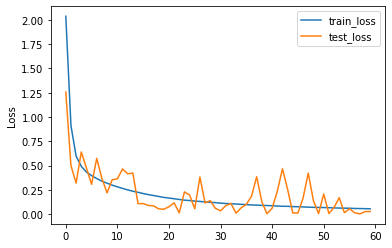

In [ ]:
plt.plot(trainingEpoch_loss, label='train_loss')
plt.plot(testingEpoch_loss,label='test_loss')
plt.ylabel("Loss")
plt.legend()
plt.show()